# Kaggle Dataset: Used Cars

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Custom functions

In [2]:
def calculate_price_in_rupee(row):
    
    '''The function calculates the price in rupees based on values in New_Price column 
    reflected as numbers with scientific notation abbreviations: either in Cr or Lakh. 
    It converts these values into normal numbers using the values from Price_Notation column 
    and assigns new numeric values to New_Price column.'''
    
    price_number = row['New_Price']
    price_text = row['Price_Notation']
     
    conversion_factors ={
        'lakh':100000,
        'cr':10000000
    }
    
    return price_number * conversion_factors.get(price_text, 1)

## Initial Data Examination and Exploration

In [3]:
used_cars = pd.read_csv('used_cars_data.csv')

In [4]:
used_cars.sample(15, random_state = 123)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4289,4289,Hyundai Verna Transform Xxi ABS,Bangalore,2011,60000,Petrol,Manual,First,16.2 kmpl,1599 CC,103.2 bhp,5.0,NaN,3.95
3718,3718,Volkswagen Polo Diesel Comfortline 1.2L,Delhi,2013,77445,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,3.75
1565,1565,Volkswagen Passat Diesel Highline 2.0 TDI,Chennai,2011,95000,Diesel,Automatic,Second,18.33 kmpl,1968 CC,167.7 bhp,5.0,NaN,8.50
3294,3294,Chevrolet Beat LT,Pune,2011,48000,Petrol,Manual,Second,18.6 kmpl,1199 CC,79.4 bhp,5.0,NaN,1.80
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,NaN,13.00
192,192,Ford Figo Diesel ZXI,Chennai,2010,120000,Diesel,Manual,First,20.0 kmpl,1399 CC,68 bhp,5.0,NaN,2.60
4093,4093,Maruti Ciaz ZDi,Delhi,2015,46166,Diesel,Manual,Second,26.21 kmpl,1248 CC,88.5 bhp,5.0,NaN,5.50
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
6934,6934,Maruti A-Star Vxi,Chennai,2009,53000,Petrol,Manual,Second,19.0 kmpl,998 CC,66.1 bhp,5.0,NaN,NaN
5589,5589,Hyundai Elantra CRDi SX,Ahmedabad,2018,35000,Diesel,Manual,First,22.7 kmpl,1582 CC,126.2 bhp,5.0,NaN,15.00


In [5]:
used_cars.shape

(7253, 14)

In [6]:
used_cars.describe

<bound method NDFrame.describe of       S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven

In [7]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [8]:
used_cars.columns.tolist()

['S.No.',
 'Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [9]:
used_cars.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

# Data Manipulation for Further Analysis

### In 'Power', 'Engine', 'Mileage' & 'New_Price' columns splitting numbers and respective metrics

In [10]:
used_cars[['Horse_Power', 'Horse_Power_Unit']] = used_cars['Power'].str.split(' ', expand=True)

In [11]:
used_cars[['Horse_Power', 'Horse_Power_Unit']].head(2)

,Horse_Power,Horse_Power_Unit
0,58.16,bhp
1,126.2,bhp


In [12]:
# There are values equal to string 'null' in 'Hourse_Power' that needs to be treated 
used_cars.loc[used_cars['Horse_Power'] == 'null', 'Horse_Power'] = pd.NA

In [13]:
# Converting 'Hours_Power' column to numeric type
used_cars['Horse_Power'] = pd.to_numeric(used_cars['Horse_Power'])

#### splitting values in Engine column

In [14]:
used_cars[['Engine_Power', 'Engine_Power_Unit']] = used_cars['Engine'].str.split(' ', expand=True)

In [15]:
used_cars[['Engine_Power', 'Engine_Power_Unit']].head(2)

,Engine_Power,Engine_Power_Unit
0,998,CC
1,1582,CC


#### splitting values in New_Price column

In [16]:
used_cars[['New_Price', 'Price_Notation']] = used_cars['New_Price'].str.split(' ', expand = True)

In [17]:
used_cars['New_Price'] = used_cars['New_Price'].str.strip()

In [18]:
used_cars['New_Price'] = pd.to_numeric(used_cars['New_Price'])

In [19]:
# Apply the function to convert everything to rupee in New_Price
used_cars['New_Price'] = used_cars.apply(calculate_price_in_rupee, axis=1)

In [20]:
used_cars[['New_Price', 'Price_Notation']].sample(2,random_state = 1)

,New_Price,Price_Notation
2397,9.47,Lakh
3777,5.44,Lakh


#### splitting values in Mileage

In [21]:
used_cars[['Mileage', 'Mileage_Measure']] = used_cars['Mileage'].str.split(' ', expand = True)

In [22]:
used_cars['Mileage'] = pd.to_numeric(used_cars['Mileage'])

In [23]:
used_cars[['Mileage', 'Mileage_Measure']].head(2)

,Mileage,Mileage_Measure
0,26.60,km/kg
1,19.67,kmpl


In [24]:
#def convert_to_kilometer_per_litr:
#    consumption = row(used_cars['Mileage'])
#    measure = row(used_cars['Mileage_Measure'])
    
#    conversion_factors = {
#        'kpml' = 
#    }

<span style ='color:red'>[Note] There are two different measures in Mileage_Measure column that must be converted to identical measure</span>

In [25]:


used_cars['Mileage_Measure'].value_counts()

kmpl     7177
km/kg      74
Name: Mileage_Measure, dtype: int64

# Data Visualization

### Distribution of Data

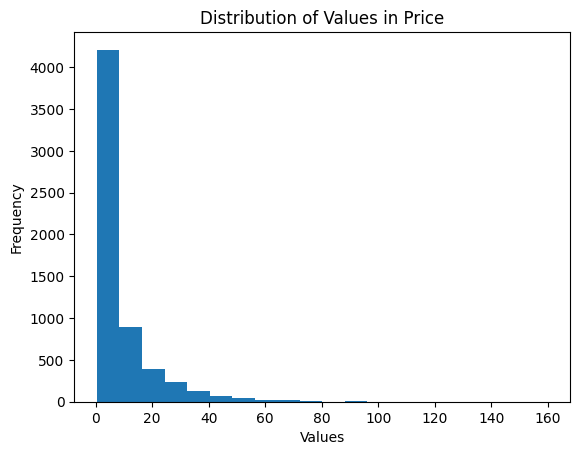

In [26]:
plt.hist(used_cars['Price'], bins=20)   
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values in Price')
plt.show()

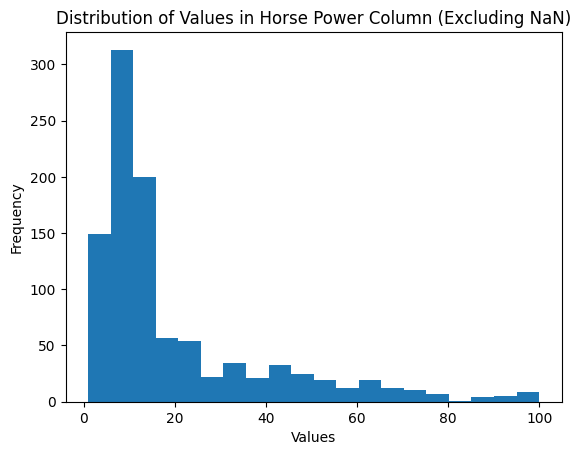

In [27]:
# Drop NaN values from the 'Horse_Power' column

data = used_cars['New_Price'].dropna()

# Plot histogram
plt.hist(data, bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values in Horse Power Column (Excluding NaN)')
plt.show()

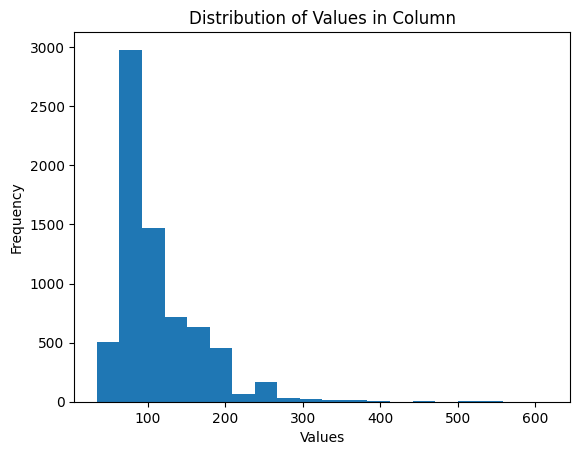

In [28]:
plt.hist(used_cars['Horse_Power'], bins=20)  
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values in Column')
plt.show()

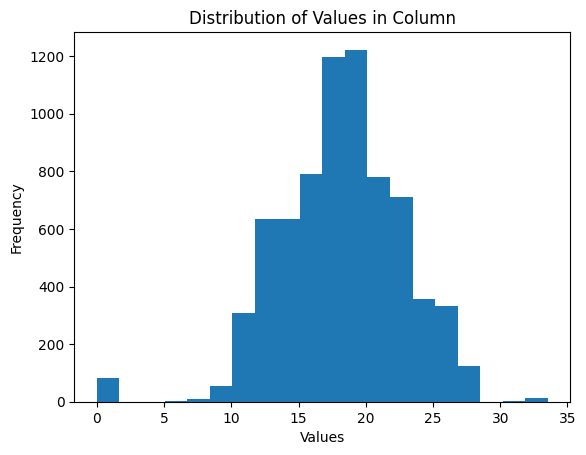

In [29]:
plt.hist(used_cars['Mileage'], bins=20)  
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values in Column')
plt.show()

In [30]:
brand_list = list(used_cars['Name'].str.split().str[0].unique())

In [31]:
brand_list

['Maruti',
 'Hyundai',
 'Honda',
 'Audi',
 'Nissan',
 'Toyota',
 'Volkswagen',
 'Tata',
 'Land',
 'Mitsubishi',
 'Renault',
 'Mercedes-Benz',
 'BMW',
 'Mahindra',
 'Ford',
 'Porsche',
 'Datsun',
 'Jaguar',
 'Volvo',
 'Chevrolet',
 'Skoda',
 'Mini',
 'Fiat',
 'Jeep',
 'Smart',
 'Ambassador',
 'Isuzu',
 'ISUZU',
 'Force',
 'Bentley',
 'Lamborghini',
 'Hindustan',
 'OpelCorsa']

In [32]:
for brand in brand_list:
    print(brand, used_cars['Name'][used_cars['Name'].str.split().str[0] == brand].value_counts())

Maruti Maruti Swift VDI                     49
Maruti Swift Dzire VDI               42
Maruti Swift VDI BSIV                37
Maruti Ritz VDi                      35
Maruti Alto LXi                      30
                                     ..
Maruti Swift AMT DDiS VDI             1
Maruti Celerio ZXI Optional           1
Maruti Wagon R VXi BSII               1
Maruti Swift 1.3 VXI ABS              1
Maruti Vitara Brezza ZDi Plus AMT     1
Name: Name, Length: 311, dtype: int64
Hyundai Hyundai Grand i10 Sportz               32
Hyundai i10 Sportz                     31
Hyundai EON Era Plus                   25
Hyundai Verna 1.6 SX                   25
Hyundai i10 Sportz 1.2                 23
                                       ..
Hyundai i20 Active S Diesel             1
Hyundai i20 Active 1.2 SX Dual Tone     1
Hyundai Getz GLS ABS                    1
Hyundai Verna Transform SX VTVT         1
Hyundai Elite i20 Magna Plus            1
Name: Name, Length: 296, dtype: int64
Honda H

Volvo Volvo V40 Cross Country D3        3
Volvo XC90 2007-2015 D5 AWD       3
Volvo XC60 D5                     3
Volvo S60 D4 KINETIC              3
Volvo XC60 D4 SUMMUM              2
Volvo S80 D5                      2
Volvo S60 D4 Momentum             2
Volvo S60 D4 SUMMUM               1
Volvo S80 2006-2013 D5            1
Volvo S60 D3                      1
Volvo XC60 D5 Inscription         1
Volvo S60 D5 Summum               1
Volvo XC60 D4 Summum              1
Volvo XC90 2007-2015 D5 AT AWD    1
Volvo V40 D3 R Design             1
Volvo V40 D3                      1
Volvo S60 D5 Kinetic              1
Name: Name, dtype: int64
Chevrolet Chevrolet Beat LT                        15
Chevrolet Cruze LTZ                      13
Chevrolet Beat LS                        12
Chevrolet Beat Diesel LT                 10
Chevrolet Beat Diesel LS                 10
Chevrolet Cruze LTZ AT                   10
Chevrolet Spark 1.0 LT                    7
Chevrolet Spark 1.0 LS                 

In [33]:
brands = ['Hyundai', 'Mercedes-Benz', 'Volkswagen', 'Audi', 'Nissan']

In [34]:
for i in brands:
    unique_one = used_cars['Name'].str.contains(i).sum()
    print(unique_one)

1340
380
374
286
117
